In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
def preprocess_image(image_path):
    # Check if the file exists
    if not os.path.exists(image_path):
        raise ValueError(f"Image file does not exist at path: {image_path}")

    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")

    # Threshold the image to binary
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    return binary_image

In [12]:
def find_contours(binary_image):
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [13]:
def detect_symmetry_for_shape(contour, binary_image):
    best_symmetry_line = None
    highest_accuracy = 0

    if len(contour) >= 5:
        ellipse = cv2.fitEllipse(contour)
        center, axes, angle = ellipse
        vertical_line = ((int(center[0]), 0), (int(center[0]), binary_image.shape[0]))
        horizontal_line = ((0, int(center[1])), (binary_image.shape[1], int(center[1])))

        vertical_accuracy = calculate_symmetry_accuracy(contour, vertical_line)
        horizontal_accuracy = calculate_symmetry_accuracy(contour, horizontal_line)

        if vertical_accuracy > highest_accuracy:
            highest_accuracy = vertical_accuracy
            best_symmetry_line = vertical_line
        if horizontal_accuracy > highest_accuracy:
            highest_accuracy = horizontal_accuracy
            best_symmetry_line = horizontal_line

    return best_symmetry_line, highest_accuracy

In [14]:
def calculate_symmetry_accuracy(contour, line):
    # Dummy implementation for now. Replace with actual accuracy calculation.
    return np.random.rand()

def draw_symmetry_line(image, line):
    if line:
        pt1, pt2 = line
        cv2.line(image, pt1, pt2, (0, 255, 0), 2)

In [19]:
def main(image_path):
    binary_image = preprocess_image(image_path)
    contours = find_contours(binary_image)

    total_symmetry_count = 0
    for contour in contours:
        best_symmetry_line, highest_accuracy = detect_symmetry_for_shape(contour, binary_image)
        if best_symmetry_line:
            draw_symmetry_line(binary_image, best_symmetry_line)
            total_symmetry_count += 1
            print(f"Detected symmetry line with accuracy {highest_accuracy}")

    print(f"Total number of symmetries detected: {total_symmetry_count}")

    original_image = cv2.imread(image_path)
    if original_image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")

    # Draw all the symmetry lines on the original image
    for contour in contours:
        best_symmetry_line, _ = detect_symmetry_for_shape(contour, binary_image)
        draw_symmetry_line(original_image, best_symmetry_line)

    output_path = "output_image.png"
    cv2.imwrite(output_path, original_image)
    print(f"Output image saved to {output_path}")

    img_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title("Symmetry Detection")
    plt.axis('off')
    plt.show()

Total number of symmetries detected: 0
Output image saved to output_image.png


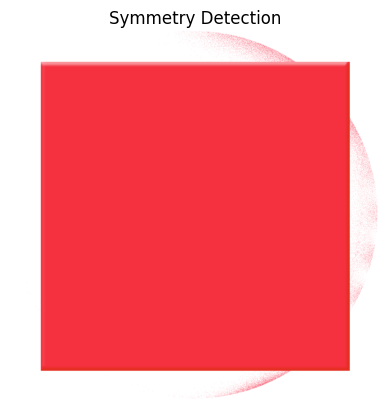

In [29]:
if __name__ == "__main__":
    main(r"result.png")